In [1]:
import gensim
import arxiv
import pandas as pd

import itertools

import matplotlib.pyplot as plt

%matplotlib inline

from concurrent.futures import ProcessPoolExecutor 

In [2]:
def map_parallel(f, iterable, **kwargs):
  with ProcessPoolExecutor() as pool:
    result = pool.map(f, iterable, **kwargs)
  return result

def retrieve_articles(start, chunksize=1000):
  return arxiv.query(
    search_query=search_query,
    start=start,
    max_results=chunksize
  )

# Load ML articles from arxiv

In [3]:
%%time

search_query = 'machine learning'

max_n_articles = 5000 

result_chunks = list(map_parallel(
  retrieve_articles,
  range(0, max_n_articles, 1000)
))

results = list(itertools.chain(*result_chunks))

print('Retrieved {} articles'.format(len(results)))

Retrieved 4000 articles
CPU times: user 463 ms, sys: 35.2 ms, total: 498 ms
Wall time: 21.1 s


## Display some basic information

In [4]:
n_examples = 20

for entry in results[:n_examples]:
  print(20 * '*')
  print(entry['title'])
  print(20 * '*')
  print(', '.join(entry['authors']))
  print(entry['date'])
  print(entry['summary'])
  print()

********************
Minimax deviation strategies for machine learning and recognition with
  short learning samples
********************
Michail Schlesinger, Evgeniy Vodolazskiy
2017-07-16T09:15:08Z
The article is devoted to the problem of small learning samples in machine
learning. The flaws of maximum likelihood learning and minimax learning are
looked into and the concept of minimax deviation learning is introduced that is
free of those flaws.

********************
MLBench: How Good Are Machine Learning Clouds for Binary Classification
  Tasks on Structured Data?
********************
Yu Liu, Hantian Zhang, Luyuan Zeng, Wentao Wu, Ce Zhang
2017-10-16T11:13:32Z
We conduct an empirical study of machine learning functionalities provided by
major cloud service providers, which we call machine learning clouds. Machine
learning clouds hold the promise of hiding all the sophistication of running
large-scale machine learning: Instead of specifying how to run a machine
learning task, users o

In [5]:
articles_df = pd.DataFrame(results)

In [6]:
articles_df.columns

Index(['affiliation', 'arxiv_comment', 'arxiv_primary_category', 'arxiv_url',
       'author', 'author_detail', 'authors', 'doi', 'guidislink', 'id',
       'journal_reference', 'links', 'pdf_url', 'published',
       'published_parsed', 'summary', 'summary_detail', 'tags', 'title',
       'title_detail', 'updated', 'updated_parsed'],
      dtype='object')

In [7]:
articles_df.head()

,affiliation,arxiv_comment,arxiv_primary_category,arxiv_url,author,author_detail,authors,doi,guidislink,id,...,pdf_url,published,published_parsed,summary,summary_detail,tags,title,title_detail,updated,updated_parsed
0,None,None,"{'scheme': 'http://arxiv.org/schemas/atom', 't...",http://arxiv.org/abs/1707.04849v1,Evgeniy Vodolazskiy,{'name': 'Evgeniy Vodolazskiy'},"[Michail Schlesinger, Evgeniy Vodolazskiy]",None,True,http://arxiv.org/abs/1707.04849v1,...,http://arxiv.org/pdf/1707.04849v1,2017-07-16T09:15:08Z,"(2017, 7, 16, 9, 15, 8, 6, 197, 0)",The article is devoted to the problem of small...,{'value': 'The article is devoted to the probl...,"[{'scheme': 'http://arxiv.org/schemas/atom', '...",Minimax deviation strategies for machine learn...,{'value': 'Minimax deviation strategies for ma...,2017-07-16T09:15:08Z,"(2017, 7, 16, 9, 15, 8, 6, 197, 0)"
1,None,None,"{'scheme': 'http://arxiv.org/schemas/atom', 't...",http://arxiv.org/abs/1707.09562v3,Ce Zhang,{'name': 'Ce Zhang'},"[Yu Liu, Hantian Zhang, Luyuan Zeng, Wentao Wu...",None,True,http://arxiv.org/abs/1707.09562v3,...,http://arxiv.org/pdf/1707.09562v3,2017-07-29T21:59:18Z,"(2017, 7, 29, 21, 59, 18, 5, 210, 0)",We conduct an empirical study of machine learn...,{'value': 'We conduct an empirical study of ma...,"[{'scheme': 'http://arxiv.org/schemas/atom', '...",MLBench: How Good Are Machine Learning Clouds ...,{'value': 'MLBench: How Good Are Machine Learn...,2017-10-16T11:13:32Z,"(2017, 10, 16, 11, 13, 32, 0, 289, 0)"
2,None,"109 pages, class notes of Machine Learning cou...","{'scheme': 'http://arxiv.org/schemas/atom', 't...",http://arxiv.org/abs/0904.3664v1,Amnon Shashua,{'name': 'Amnon Shashua'},[Amnon Shashua],None,True,http://arxiv.org/abs/0904.3664v1,...,http://arxiv.org/pdf/0904.3664v1,2009-04-23T11:40:57Z,"(2009, 4, 23, 11, 40, 57, 3, 113, 0)",Introduction to Machine learning covering Stat...,{'value': 'Introduction to Machine learning co...,"[{'scheme': 'http://arxiv.org/schemas/atom', '...",Introduction to Machine Learning: Class Notes ...,{'value': 'Introduction to Machine Learning: C...,2009-04-23T11:40:57Z,"(2009, 4, 23, 11, 40, 57, 3, 113, 0)"
3,None,"Paper at AutoML workshop in ICML, 2015","{'scheme': 'http://arxiv.org/schemas/atom', 't...",http://arxiv.org/abs/1507.02188v1,Artus Krohn-Grimberghe,{'name': 'Artus Krohn-Grimberghe'},"[Abhishek Thakur, Artus Krohn-Grimberghe]",None,True,http://arxiv.org/abs/1507.02188v1,...,http://arxiv.org/pdf/1507.02188v1,2015-07-08T15:07:39Z,"(2015, 7, 8, 15, 7, 39, 2, 189, 0)","In this paper, we propose AutoCompete, a highl...","{'value': 'In this paper, we propose AutoCompe...","[{'scheme': 'http://arxiv.org/schemas/atom', '...",AutoCompete: A Framework for Machine Learning ...,{'value': 'AutoCompete: A Framework for Machin...,2015-07-08T15:07:39Z,"(2015, 7, 8, 15, 7, 39, 2, 189, 0)"
4,None,4 pages,"{'scheme': 'http://arxiv.org/schemas/atom', 't...",http://arxiv.org/abs/1212.2686v1,Yoshua Bengio,{'name': 'Yoshua Bengio'},"[Ian Goodfellow, Aaron Courville, Yoshua Bengio]",None,True,http://arxiv.org/abs/1212.2686v1,...,http://arxiv.org/pdf/1212.2686v1,2012-12-12T01:59:27Z,"(2012, 12, 12, 1, 59, 27, 2, 347, 0)",We introduce a new method for training deep Bo...,{'value': 'We introduce a new method for train...,"[{'scheme': 'http://arxiv.org/schemas/atom', '...",Joint Training of Deep Boltzmann Machines,{'value': 'Joint Training of Deep Boltzmann Ma...,2012-12-12T01:59:27Z,"(2012, 12, 12, 1, 59, 27, 2, 347, 0)"


## Extract keywords from summaries

In [8]:
def extract_keywords(text):
  return gensim.summarization.keywords(
    text=text,
    lemmatize=True,
    split=True
  )

In [9]:
%%time

articles_df['summary_keywords'] = pd.Series(list(map_parallel(extract_keywords, articles_df['summary'])))

CPU times: user 2.35 s, sys: 292 ms, total: 2.64 s
Wall time: 58.6 s


In [10]:
for __, row in itertools.islice(articles_df.iterrows(), n_examples):
  print(20 * '*')
  print(row['title'])
  print(20 * '*')
  print('keywords:', row['summary_keywords'])
  print()

********************
Minimax deviation strategies for machine learning and recognition with
  short learning samples
********************
keywords: ['learning']

********************
MLBench: How Good Are Machine Learning Clouds for Binary Classification
  Tasks on Structured Data?
********************
keywords: ['machine learning', 'clouds', 'study', 'comes', 'code', 'future', 'classication', 'benchmark']

********************
Introduction to Machine Learning: Class Notes 67577
********************
keywords: ['learning', 'duality', 'sampling', 'double']

********************
AutoCompete: A Framework for Machine Learning Competition
********************
keywords: ['machine', 'learned', 'evaluation', 'model', 'human', 'types', 'data']

********************
Joint Training of Deep Boltzmann Machines
********************
keywords: ['methods', 'machines', 'learning']

********************
Proceedings of the 2016 ICML Workshop on #Data4Good: Machine Learning in
  Social Good Applications
***

In [11]:
article_keyword_lengths = articles_df['summary_keywords'].apply(len)

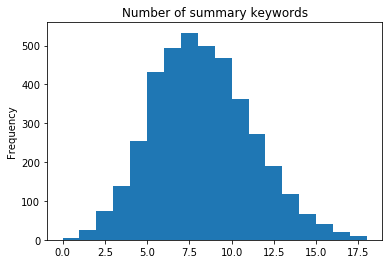

In [14]:
article_keyword_lengths.plot.hist(bins=article_keyword_lengths.max(), title='Number of summary keywords')